## 문제1) 당뇨병 데이터로 다중회귀, LinearRegression, SVR, RandomForestRegressorMSE 비교

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


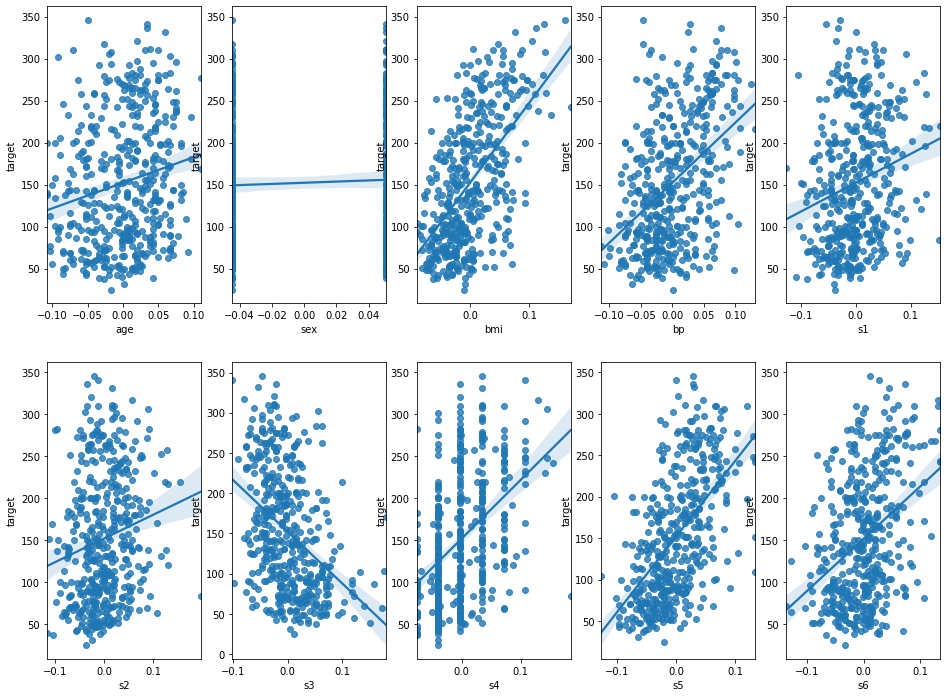

In [14]:
_, axs = plt.subplots(nrows=2, ncols=5, figsize=(16,12))
for i, feature in enumerate(df.columns[0:-1]):
    row, col = i//5, i%5
    sns.regplot(x=feature, y='target', data=df, ax=axs[row][col])

In [15]:
# age
from sklearn.linear_model import LinearRegression

In [16]:
X = df.age.values.reshape(-1,1)
y = diabetes.target
lr = LinearRegression()
lr.fit(X, y)
lr.score(X,y)

0.03530218264671636

In [17]:
y = diabetes.target
for feature in df.columns[:-1]:
    X = df[feature].values.reshape(-1,1)
    lr = LinearRegression()
    lr.fit(X, y)
    score = lr.score(X, y)
    print(f'{feature}:\t{score:.4f}')

age:	0.0353
sex:	0.0019
bmi:	0.3439
bp:	0.1949
s1:	0.0450
s2:	0.0303
s3:	0.1559
s4:	0.1853
s5:	0.3202
s6:	0.1463


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size = 0.1, random_state=2021
)

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
lr.score(X_test, y_test)

0.45584017860891035

In [21]:
lr.coef_

array([ -14.06014661, -246.92791992,  547.80956855,  286.58708365,
       -656.22582592,  364.21134557,   60.28474402,  182.53318837,
        702.08292875,   68.21197298])

In [22]:
lr.intercept_

151.67372554450927

In [23]:
X_test[0], y_test[0]

(array([ 0.03444337, -0.04464164, -0.00728377,  0.01498661, -0.0442235 ,
        -0.03732595, -0.00290283, -0.03949338, -0.02139368,  0.00720652]),
 155.0)

In [24]:
np.dot(X_test[0], lr.coef_) + lr.intercept_

156.03121643727494

In [25]:
lr.predict(X_test[:1])

array([156.03121644])

In [27]:
for i in range(10):
    pred = np.dot(X_test[i], lr.coef_) + lr.intercept_
    print(f'실제값:{y_test[i]}, 예측값:{pred:.2f}')

실제값:155.0, 예측값:156.03
실제값:167.0, 예측값:185.70
실제값:185.0, 예측값:162.86
실제값:109.0, 예측값:162.55
실제값:65.0, 예측값:78.52
실제값:77.0, 예측값:60.60
실제값:277.0, 예측값:175.20
실제값:244.0, 예측값:176.77
실제값:148.0, 예측값:131.43
실제값:102.0, 예측값:88.05


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.1, random_state=2021
)

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
pred_lr

array([156.03121644, 185.70049526, 162.86384045, 162.54544148,
        78.51849397,  60.6006943 , 175.198247  , 176.7708708 ,
       131.42519735,  88.0537722 , 182.06745271, 125.38694592,
       122.94584881, 175.88337484, 165.04366099, 122.46227623,
       154.00789511, 156.28760568, 163.873603  , 190.61471428,
        81.91824922, 149.28474513, 168.78043889,  52.665137  ,
       253.98654186, 253.16663718, 142.5383034 , 201.95489834,
       125.09884927, 155.64491829, 168.33251496, 111.73916649,
       141.34776468, 159.39865731, 129.45826426, 122.49486964,
       155.00302033, 204.71273072, 175.97337738, 231.52683591,
       231.65409045, 186.87966013, 160.36515649, 125.57517593,
        89.00504061])

In [6]:
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test, pred_lr)
mse_lr

2370.1978745563174

In [9]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
pred_sv = svr.predict(X_test)
mse_sv = mean_squared_error(y_test, pred_sv)
mse_sv

3960.9366880199996

In [10]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=2021)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, pred_rf)
mse_rf

3824.664311111111

In [28]:
print(f'선형회귀 : {mse_lr} , 서포트벡터머신:{mse_sv}, 랜덤포레스트 : {mse_rf}')

선형회귀 : 2370.1978745563174 , 서포트벡터머신:3960.9366880199996, 랜덤포레스트 : 3824.664311111111
